In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Linear Regression

In [2]:
pd.set_option('display.max_columns',100)
df = pd.read_csv("auto.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# EDA :-

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [4]:
#dropping duplicates 
df.drop_duplicates(df.columns,inplace=True)

In [5]:
df1 = df.isnull()
for column in df1.columns :
    if df1[column].value_counts()[0]<len(df) :
        print("column :",column,";     null : ",len(df1)-df1[column].value_counts()[0])

column : stroke ;     null :  4
column : horsepower-binned ;     null :  1


In [6]:
# replace null values in stroke with  mean of the column
df['stroke'].fillna(value=df['stroke'].mean(),inplace=True)
df['stroke'].isnull().value_counts()

False    201
Name: stroke, dtype: int64

In [7]:
df.shape

(201, 31)

In [8]:
df.nunique()

Unnamed: 0           201
Unnamed: 0.1         201
symboling              6
normalized-losses     51
make                  22
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-type            6
num-of-cylinders       7
engine-size           43
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
city-L/100km          29
horsepower-binned      3
diesel                 2
gas                    2
dtype: int64

In [9]:
df.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.000000,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,NaN,NaN,NaN,NaN,22,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,NaN,NaN,32,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,100.000000,100.000000,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,58.167861,58.167861,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,0.000000,0.000000,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,50.000000,50.000000,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,100.000000,100.000000,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,150.000000,150.000000,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


<AxesSubplot:>

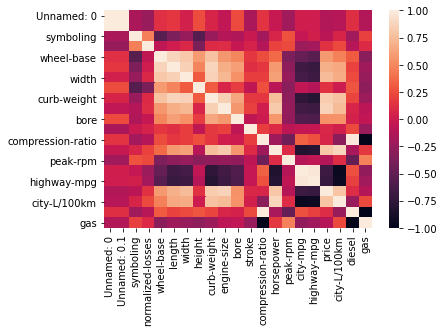

In [10]:
sns.heatmap(df.corr())

# VISUVALISATION :-

<AxesSubplot:xlabel='diesel', ylabel='count'>

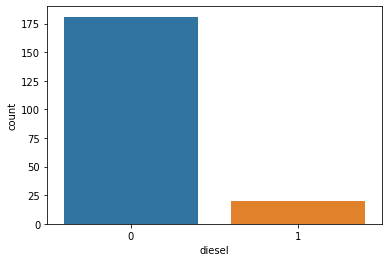

In [11]:
# HERE 1 INDICATE DIESEL BASED VEHICLES AND 0 INDICATES OTHER THAN DIESEL i.e (gas based vehicles)
sns.countplot(x='diesel', data=df)

<AxesSubplot:xlabel='gas', ylabel='count'>

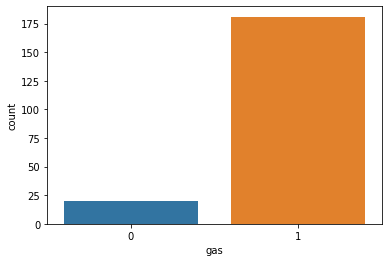

In [12]:
# HERE 1 INDICATE GAS BASED VEHICLES AND 0 indicates OTHER THAN GAS (i.e desiel based vehicles)
sns.countplot(x='gas', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='count'>

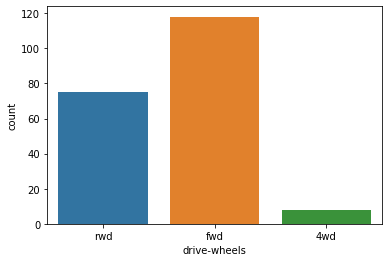

In [13]:
# this graph shows count of different types base wheel dribe 
sns.countplot(x='drive-wheels', data=df)

<AxesSubplot:xlabel='horsepower-binned', ylabel='price'>

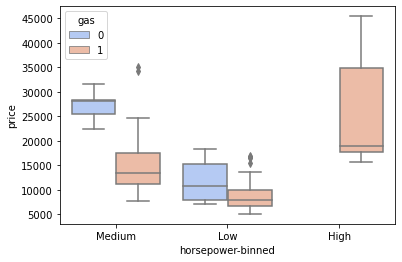

In [14]:
# note : boxplot ---> all of the plot components correspond to actual datapoints

# HERE WE CAN SEE THE RANGE OF PRICES OF LOW , MID AND HIGH HOURSEPOWERED VEHICLES 
# AND AMOUNG THIS WE CAN CATOGERISE THEM INTO GAS AND NON-GAS BASED VEHICLES 
#( 0 -> DESIEL BASED VEHICLES , 1 -> GAS BASED VEHICLES)

sns.boxplot(x="horsepower-binned", y="price", hue="gas",data=df, palette="coolwarm")

<AxesSubplot:xlabel='horsepower-binned', ylabel='price'>

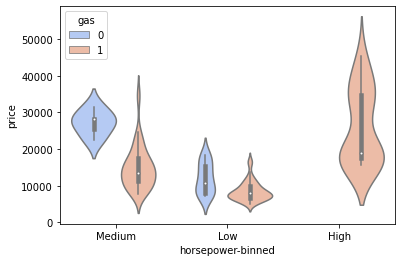

In [15]:
# Similar to boxplot
# Violin plot features a kernel density estimation of the underlying distribution. but not actual data points
sns.violinplot(x="horsepower-binned", y="price", hue="gas",data=df, palette="coolwarm")

<AxesSubplot:xlabel='horsepower-binned', ylabel='city-L/100km'>

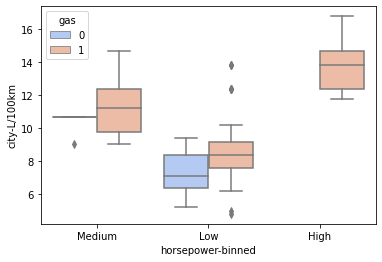

In [16]:
# WE CAN OBSERVE THE MILAGE OF GAS AND DESIEL BASED VEHICLES WITH RESPECT TO THEIR HOURSEPOWER 
sns.boxplot(x="horsepower-binned", y="city-L/100km", hue="gas",data=df, palette="coolwarm")

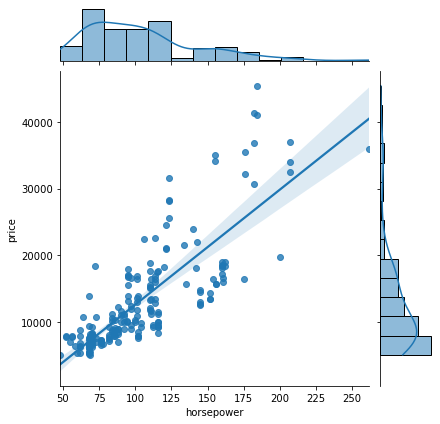

In [17]:
# her we can see the best-fit line(regression line) with feature as horsepower and target as price
#also univariate distribution(i.e similar to normal distribution) of data hoursepower and price 
#also frequency distribution of hoursepower and price through histograms
sns.jointplot(x='horsepower',y='price',data=df,kind="reg")

# CORRELATION TABLE :-

In [18]:
corr_df=df.corr()
corr_df

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
Unnamed: 0,1.000000,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162565,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
Unnamed: 0.1,1.000000,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,-0.162565,0.144301,-0.022474,-0.195662,0.027956,0.020344,-0.118214,-0.099157,0.121454,-0.121454
symboling,-0.162764,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.007992,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,-0.241092,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055127,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,0.125517,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.157964,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.161848,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123913,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.043976,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188814,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.252015,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060822,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.064820,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167412,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.047764,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205806,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779


In [19]:
#here we can see dependency factors of price on other attributes 
corr_df['price']

Unnamed: 0          -0.118214
Unnamed: 0.1        -0.118214
symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082267
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

From the above data we can state that price is most dependent on horsepower

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = df['horsepower']
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [23]:
print(LR.coef_)
print(LR.intercept_)

[[149.79992461]]
[-2715.71192708]


In [24]:
print("THE BEST FIT LINE(REGRESSION LINE IS)")
print("Y = ",LR.coef_[0],"X + ",LR.intercept_)

THE BEST FIT LINE(REGRESSION LINE IS)
Y =  [149.79992461] X +  [-2715.71192708]


In [25]:
df_result1 = pd.DataFrame(y_test.values,columns=['actual'])            

In [26]:
df_result1['predicted'] = LR.predict(np.array(x_test).reshape(-1,1)).reshape(1,51)[0]

In [46]:
df_result1.head(10)

,actual,predicted
0,8249.0,7620.482871
1,41315.0,24547.874351
2,6855.0,8669.082343
3,9258.0,7770.282795
4,11850.0,13762.279779
5,5572.0,7470.682946
6,35056.0,20503.276387
7,9988.0,11065.881137
8,15998.0,21402.075934
9,35550.0,23649.074803


In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(df_result1['actual'], df_result1['predicted']))
print('MSE:', metrics.mean_squared_error(df_result1['actual'], df_result1['predicted']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_result1['actual'], df_result1['predicted'])))

MAE: 4224.882491883742
MSE: 38474079.582453795
RMSE: 6202.747744544654


CALCULATING without using library

In [29]:
MAE = sum(np.abs(df_result1['actual']-df_result1['predicted']))/len(df_result1)
MSE = sum((df_result1['actual']-df_result1['predicted'])**2)/len(df_result1)
RMSE = np.sqrt(sum((df_result1['actual']-df_result1['predicted'])**2)/len(df_result1))

In [30]:
print(MAE,"\n",MSE,"\n",RMSE)

4224.882491883741 
 38474079.582453795 
 6202.747744544654


# Multiple linear regression 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   Unnamed: 0.1       201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [39]:
p = pd.concat([df.iloc[:,2:4],df.iloc[:,10:15],df.iloc[:,17],df.iloc[:,19:26],df.iloc[:,27],df.iloc[:,29:]], axis=1)
q = df['price']
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.25, random_state=42)

In [40]:
p.values

array([[  3.        , 122.        ,  88.6       , ...,  11.19047619,
          0.        ,   1.        ],
       [  3.        , 122.        ,  88.6       , ...,  11.19047619,
          0.        ,   1.        ],
       [  1.        , 122.        ,  94.5       , ...,  12.36842105,
          0.        ,   1.        ],
       ...,
       [ -1.        ,  95.        , 109.1       , ...,  13.05555556,
          0.        ,   1.        ],
       [ -1.        ,  95.        , 109.1       , ...,   9.03846154,
          1.        ,   0.        ],
       [ -1.        ,  95.        , 109.1       , ...,  12.36842105,
          0.        ,   1.        ]])

In [41]:
LR.fit(p_train.values,q_train)

LinearRegression()

In [42]:
LR.coef_

array([ 1.66438883e+02,  7.18929828e+00,  2.12726823e+02, -4.21181174e+03,
        1.87503681e+04,  1.62191927e+02, -1.45702186e+00,  8.72273026e+01,
       -4.32837292e+02, -1.81810137e+03,  3.20110308e+02,  1.47406150e+01,
        7.43391486e-01,  9.88244463e+01,  1.22618114e+02,  1.56359684e+03,
       -2.65223991e+02,  2.65223991e+02])

In [43]:
LR.intercept_

-62074.12226412122

In [47]:
df_result2 = pd.DataFrame(q_test.values,columns=['actual'])
df_result2['predicted'] = LR.predict(p_test.values)
df_result2.head(10)

,actual,predicted
0,8249.0,7470.602388
1,41315.0,25633.023190
2,6855.0,5901.822142
3,9258.0,7253.285915
4,11850.0,14568.829345
5,5572.0,5428.924970
6,35056.0,26345.436003
7,9988.0,9501.528431
8,15998.0,20738.008747
9,35550.0,30210.163368


In [48]:
MAE = sum(np.abs(df_result2['actual']-df_result2['predicted']))/len(df_result1)
MSE = sum((df_result2['actual']-df_result2['predicted'])**2)/len(df_result1)
RMSE = np.sqrt(sum((df_result2['actual']-df_result2['predicted'])**2)/len(df_result1))
print(MAE," ; ",MSE," ; ",RMSE)

2982.6457043711503  ;  20891322.470338605  ;  4570.702623266866
